# SIMPLE LINEAR REGRESSION PROJECT TO PREDICT SALARY BASED ON YEARS OF EXPERIENCE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
experience_salary = pd.read_csv('Salary_Data.csv')
experience_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# just to view the last five data
experience_salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


## Data Cleaning

In [6]:
# Checking for duplicated value
experience_salary[experience_salary.duplicated()]

,YearsExperience,Salary


##### No duplicated value 

In [8]:
# checking for Null value.
experience_salary[experience_salary.isna()].sum()

YearsExperience    0.0
Salary             0.0
dtype: float64

##### No Null value

## Cheking for Distribution of the data set.

C:\Users\MarioGozie\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

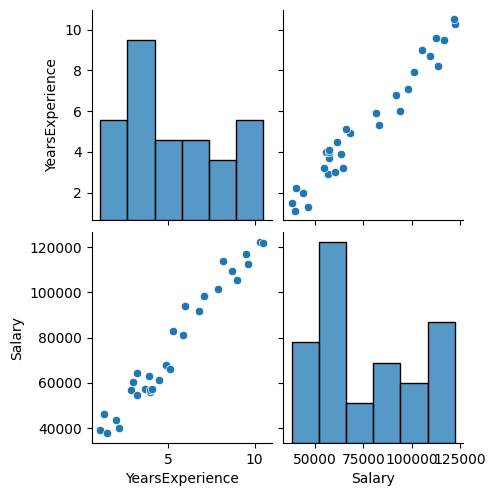

In [10]:
sns.pairplot(experience_salary)

##### There seems to be a positive linear relationship betwen the two variables which are years of experience and salary.. However I will check how strong the relationship is using a heat map. The diagonal histograms are not bell shaped as expected of a normal distribution.

<Axes: >

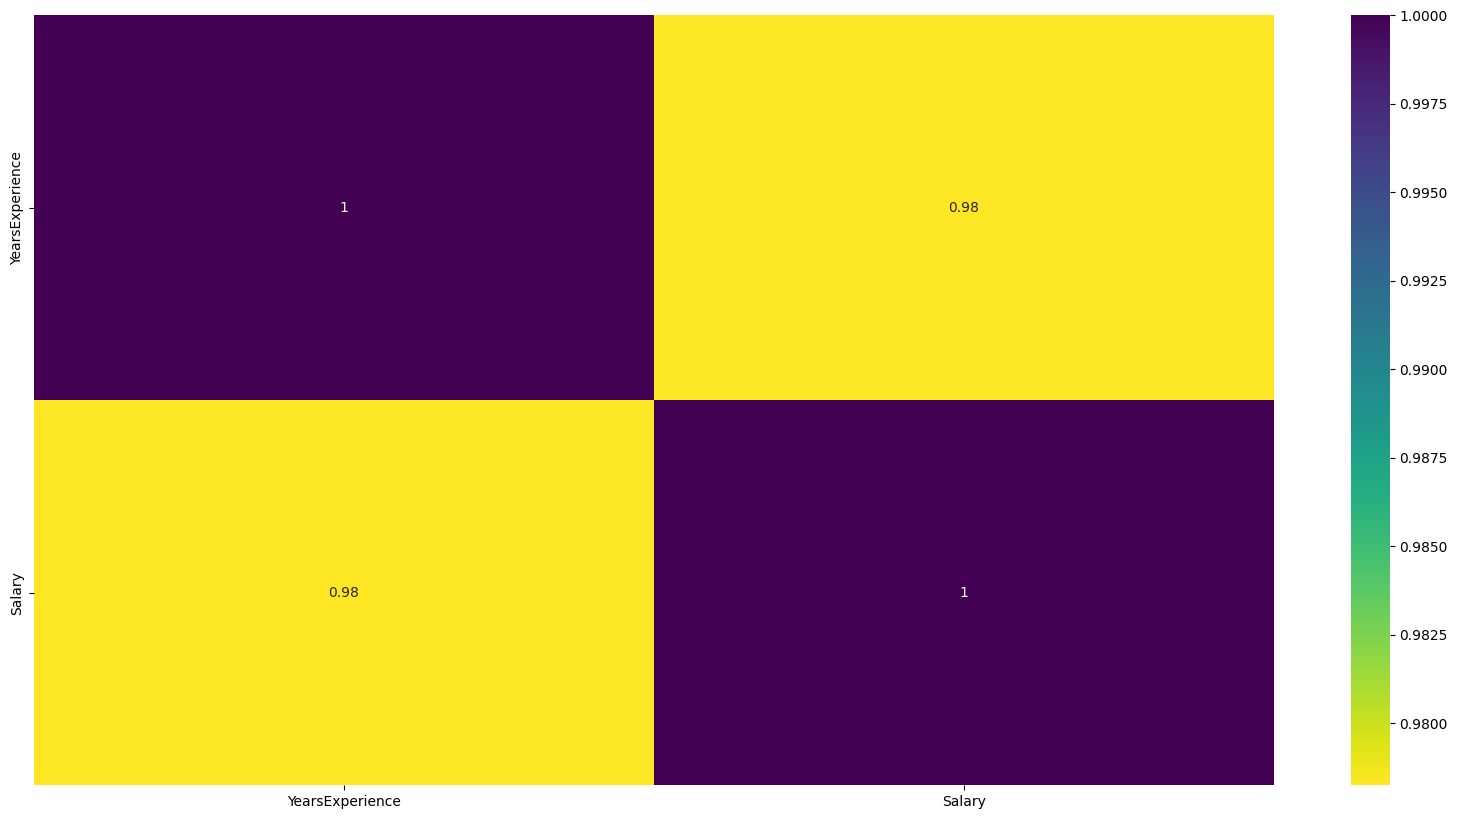

In [15]:
# Creating a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(experience_salary.corr(), annot= True, cmap= 'viridis_r') # for the colour map(cmap), I had to attach '_r'.
# because it used a light colour for stronger corrlation. viridis is the colour.


##### The maximum correlation a relationship between two  **different** variables can have is 1.  here, salary and experince have a correlation of 0.98. That is very close to 1 and shows a strong relationship. This solidifies what I can see from the pairplot that there is a strong relationship between the two variables. I can now move to linear regression proper.

## LINEAR REGRESSION PROPER

* In linear regression, there is usually an X variable, which is the predictor and the Y variable which is the response variable. In this situation, I am trying to use years of experience to predict what an employee is supposed to be paid. Since the data already has just two columns, there is no need to subset. I will go straight to let python know my Y variable and X variable.

In [16]:
# creating my Ols formula. this formula will tell ols statsmodel that anything that comes after the tilda sign ("~") is an X variable.
# Ols means Ordianary least squared

ols_formula = "Salary ~ YearsExperience"

In [17]:
# importing the ols library to create ols function.
from statsmodels.formula.api import ols

In [18]:
# building OLS
OLS = ols(formula= ols_formula, data= experience_salary)

# fitting the model this is more like drawing the lines that best fits to reduce the distance between predicted value and the actual value.
model = OLS.fit()

In [19]:
# checking for summary statistics.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        11:31:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## DISCUSSION ON SUMMARY STATISTICS 
* The **R-squared** value in the summary statistic is 0.957. This simply means that based on our model, the X variable which is Years of Experience can account for **95.7%** of the variations of the Y variable which is Salary.
* The **Intercept** value at the coeficient column represents the value of Y variable (Salary) when years of experience is Zero and its value is **2.579e+04**
* The **slope** value at the coefficient column represent how much the Y variable(Salary) changes for every single change in X. This value  which could be found in the coefficient column for the YearExperience row is **9449.9623**

### In Regression analysis there is Hypothesis testing.

* The Null Hypothsis states that there is no relation between the X and Y variable.
* The Alternative Hypothesis states that there is actuall a relationship.

If After Analysis and you get a Pvalue less than 0.05 or 5% at a 95% confidence level, you reject the null hypothesis. If the P value is greater, you accept the Null Hypothesis.

* Here, I had a P-value of 0.00 which is less than 0.05. This shows that there is a relationship between the X variable and the Y variable.

### Confidence Interval.

* In Statistics, there are uncertainties. it is true that the point estimate for the rate of chance in Y for every single change in X is **9449.9623**. but there is a confidence interval at a 95% confidence level, which is between **8674.119**  and	**1.02e+04**. This can be found in the next two columns after the pvalue for the x variable.


## RESIDUAL ANALYSIS AND ASSUMPTION CHECK

* There are Four assumptions in simple Linear Regression that should be met before a Linear model can be used for prediction. which are
1) Linearity Assumption
2) Independence Assumption
3) Homoscedasticity
4) Normality Assumption

I will go through all.



In [20]:
# Here I will try to extract only the x variable so I can get the predicted values.
X = experience_salary['YearsExperience']

# predictions
fitted_values = model.predict(X)
fitted_values.head() # just trying to see the predicted values.

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [21]:
# Using the model to get residuals which is the difference between the actual value and the predicted value.
Residuals = model.resid
Residuals.head() # Just trying to see the residuals.

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

##### Linearity Assumsmption.
* This states that the X and Y variable must have either a positive or negative linear relationship. Though I have checked this, I will have to use a regplot (regression plot) which shows confidence band to check this again. 

<Axes: xlabel='YearsExperience', ylabel='Salary'>

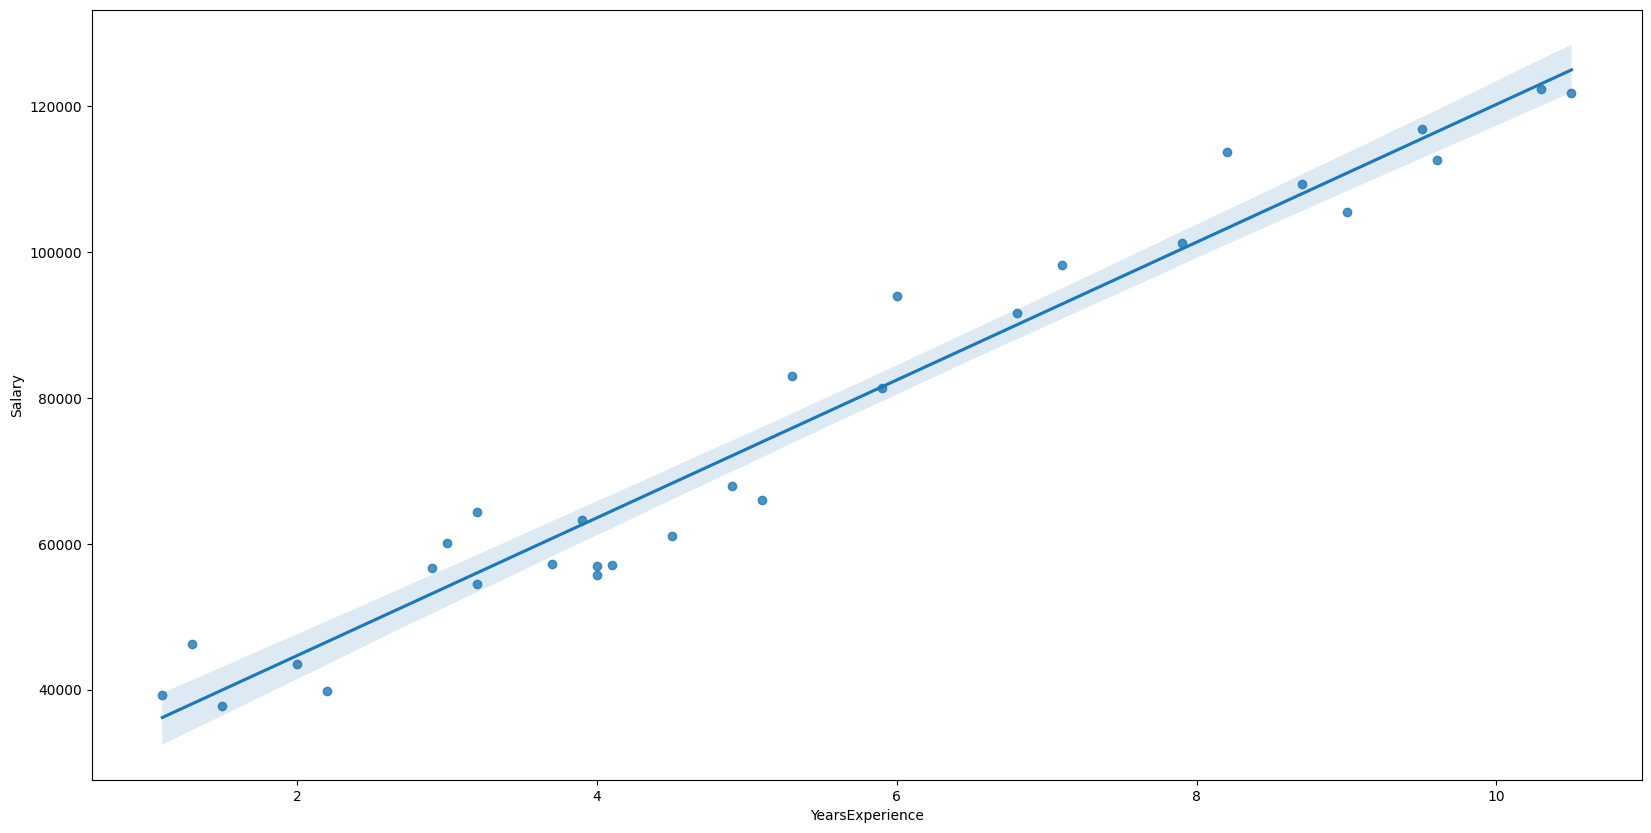

In [23]:
plt.figure(figsize= (20,10))
sns.regplot(x = 'YearsExperience', y = 'Salary', data = experience_salary )

* It is Obvious that there is a Linear correlation between Years of Experience (X) and Salary (Y). The shaded area around the fitted line shows the confidence band, which shows the confidence interval (uncertainty).

## Checking for Homoscedasticity and Independence Asumptions.

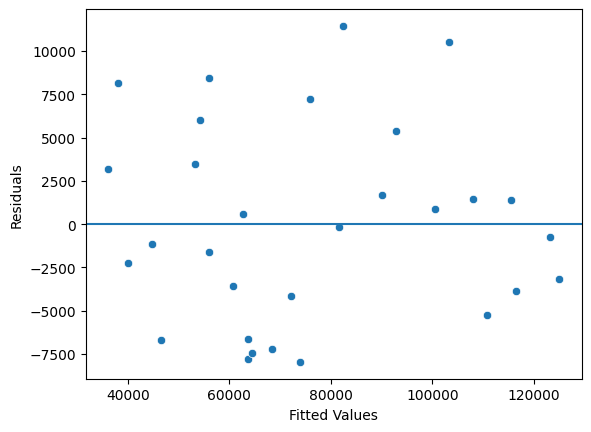

In [25]:
# Checking for Homoscedasticity and Independence

fig = sns.scatterplot(x = fitted_values, y = Residuals )
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

 Looking at the plot above, I can clearly see that there the residuals are randomly distributed. within a range. This shows that the Homoscedasticity assumption was met. Also, there is no pattern in this data set all the points appear independent. Hence, the Independence assumption was achieved.

## Checking for Normality Assumption

Text(0.5, 1.0, 'Histogram of Residuals')

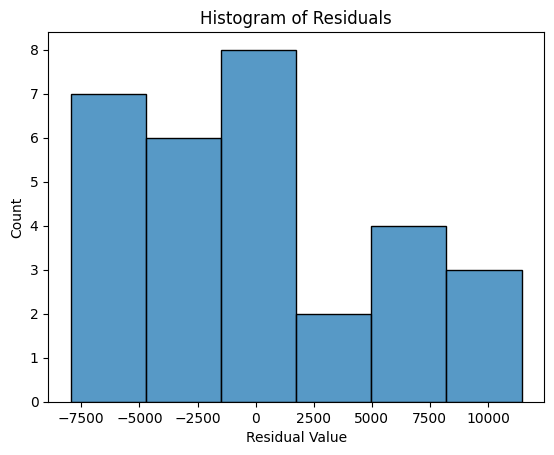

In [26]:
# Plotting a histogram to check if errors are normally distributed.
fig = sns.histplot(Residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")

The errors are fairly distributed.

## Constructing a Q-Q plot to know better about Normality Assumption 

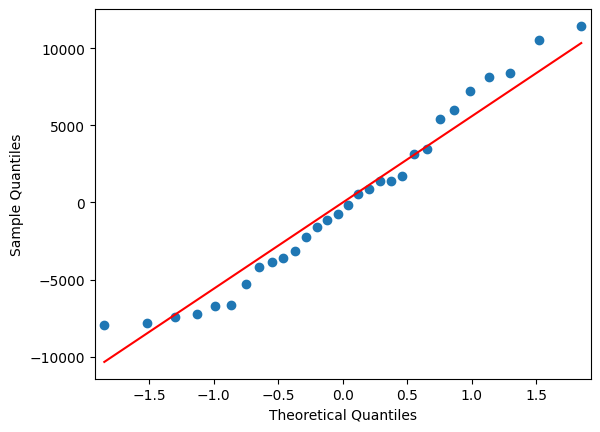

In [27]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

It is  obivious that some of the data point deviated from the diagonal line. However, the model is fair for prediction.

### Thank You!